In [ ]:
DAYS=30

In [1]:
%run ../pathutils.ipynb
%run ../database.ipynb
%run ../export.ipynb
%run health.ipynb
%run database.ipynb
%run utils.ipynb

In [ ]:
import pandas as pd

# Load the readings
df = load_sensor_readings("bme280", DAYS)

# Parse timestamp as timezone-aware UTC, set it as the index and sort
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)
df = df.set_index('timestamp').sort_index()

In [3]:
# Calculate missing value percentages
missing_values = df[['temperature', 'humidity', 'pressure']].isna().mean()

# Get the export folder path
export_folder_path = get_export_folder_path("health")

# Strip the timezone from the timestamp, as this will cause the export to spreadsheet to fail (Excel can't
# handle dates with timezone information)
df.index = df.index.tz_localize(None)

# Export the data to a spreadsheet
export_to_spreadsheet(export_folder_path, "bme280_all_missing_data.xlsx", { "Missing Data": missing_values })

# Missing Data %

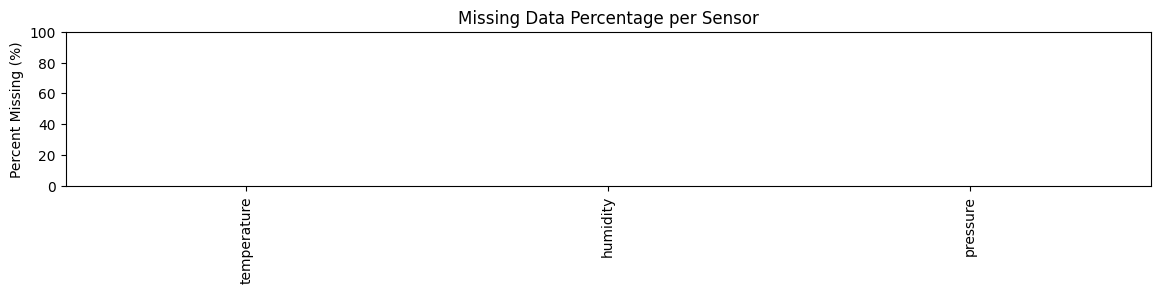

In [4]:
import matplotlib.pyplot as plt

missing_values.sort_values().plot.bar(figsize=(14,2))
plt.title("Missing Data Percentage per Sensor")
plt.ylabel("Percent Missing (%)")
plt.ylim(0, 100)

# Export to PNG or PDF, if required
export_chart(export_folder_path, f"bme280_all_missing_data", "png")

plt.show()